In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Metropolis-Hastings Algorithm

The Metropolis-Hastings algorithm is a Markov Chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution for which direct sampling is difficult. This sequence can be used to approximate the distribution (e.g., to compute integrals).

## Steps of the Algorithm

1. **Initialize**:
   - Choose an initial value $ x_0 $ from the target distribution $ \pi(x) $.
   - Set $ t = 0 $.

2. **Iterate**:
   - Propose a new value $ x' $ from a proposal distribution $ q(x' | x_t) $.
   - Compute the acceptance ratio $ \alpha $:
     $$
     \alpha = \min\left(1, \frac{\pi(x') q(x_t | x')}{\pi(x_t) q(x' | x_t)}\right)
     $$
   - Generate a uniform random number $ u \sim \mathcal{U}(0, 1) $.
   - If $ u \leq \alpha $:
     - Accept the new value: $ x_{t+1} = x' $.
   - Else:
     - Reject the new value: $ x_{t+1} = x_t $.

3. **Increment**:
   - Set $ t = t + 1 $.

4. **Repeat**:
   - Repeat steps 2 and 3 until the desired number of samples is obtained.

## Notes

- The target distribution $ \pi(x) $ is the distribution we want to sample from.
- The proposal distribution $ q(x' | x_t) $ should be easy to sample from and can be symmetric or asymmetric.
- The acceptance ratio $ \alpha $ ensures that the Markov chain has the desired stationary distribution $ \pi(x) $.
- After a sufficient number of iterations (burn-in period), the samples $ x_t $ are approximately from the target distribution $ \pi(x) $.

## Pseudo-code

```python
# Metropolis-Hastings algorithm
initialize x_0
for t = 1 to N do
    propose x' from q(x' | x_t-1)
    compute acceptance ratio α = min(1, [π(x') q(x_t-1 | x') / π(x_t-1) q(x' | x_t-1)])
    u ~ Uniform(0, 1)
    if u <= α then
        x_t = x'
    else
        x_t = x_t-1
return {x_t} for t = 1 to N

                                                                         

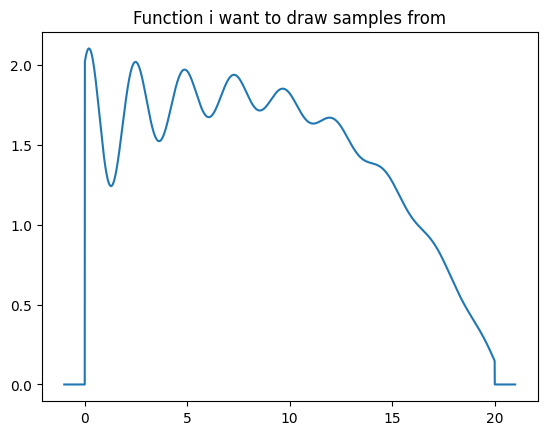

In [186]:
bmin = 0
bmax = 20
def f(x):
    if isinstance(x, float) and (x < bmin or x > bmax):
        return 0
    a = (np.cos((x/100)**2/50)+ np.sin(x*2.4 + np.sqrt(x +1)) / np.sqrt(x**2 + 4) + x**2 / 100 + np.log(x + 20)) * np.cos(x/20)**2
    a = a - 2.4
    if isinstance(x, np.ndarray):
        a[x > bmax] = 0
        a[x < bmin] = 0
    elif isinstance(x, float) and (x < bmin or x > bmax):
        a = 0
    return a

xx = np.linspace(bmin - 1, bmax + 1, 10000)
plt.title("Function i want to draw samples from")
plt.plot(xx, f(xx));

## Sampling with Metropolis-Hastings algorithm

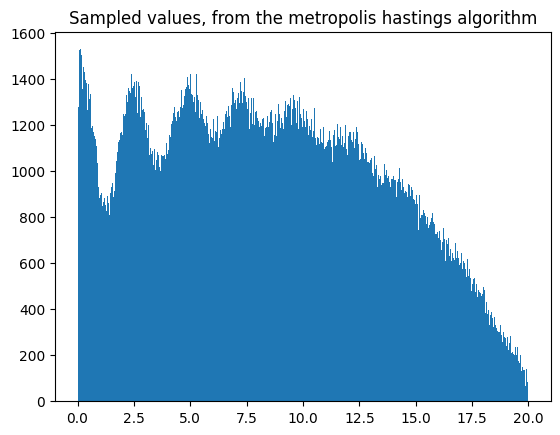

In [188]:
x = np.random.uniform(bmin, bmax)
N = 10**6
sigma = 2
xs = [x]
for i in range(N):
    gap = np.random.normal(0, sigma)
    proposed_x = x + gap
    acceptance_prob = min(1, f(proposed_x) / f(x))
    if np.random.rand() < acceptance_prob:
        x = proposed_x
    
    xs.append(x)


plt.title("Sampled values, from the metropolis hastings algorithm")
plt.hist(xs, bins=1000);
#plt.plot(xx, f(xx))